## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
# Reading the iris dataset

In [6]:
iris = pd.read_csv("iris.csv")
iris

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


## Dropping the unnecessary column

In [27]:
iris = iris.drop('species_id', axis = 1)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Exploring the data set

In [13]:
# getting the basic describtion of the dataset
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_id
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,2.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


In [15]:
# checking the info i.e. null values and the data type
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
 5   species_id    150 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [16]:
# shape of the data
iris.shape

(150, 6)

In [17]:
# displayed columns
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'species_id'],
      dtype='object')

In [19]:
# count of the column species
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

We have observed there are 50 entries of each Species, i.e.
* Iris-setosa
* Iris-versicolor
* Iris-virginica

## Visualization

In [20]:
# Plot for species column by count

<Axes: xlabel='count', ylabel='species'>

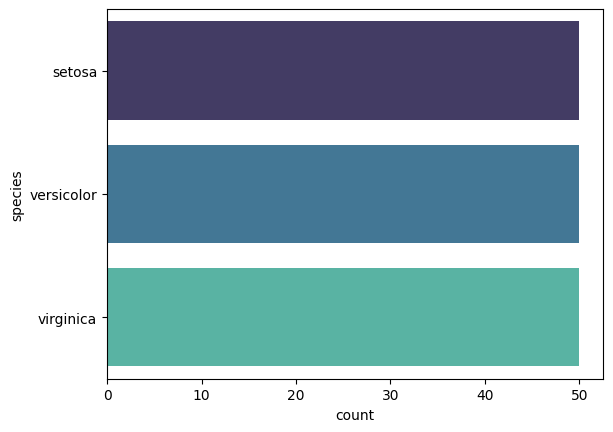

In [22]:
sns.countplot(y= iris.species, palette = "mako")

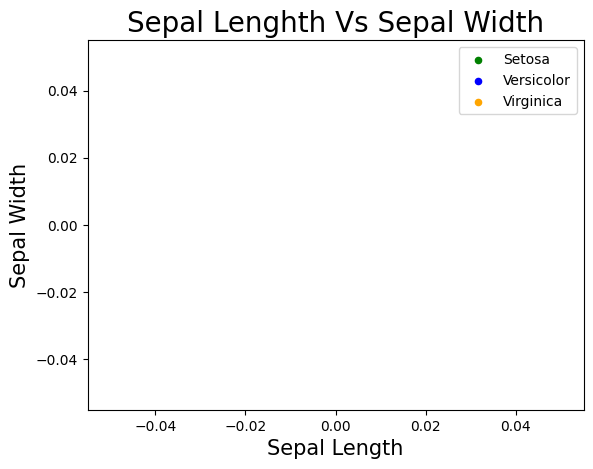

In [29]:
#Sepal length VS Sepal Width
fig = iris[iris.species == 'Iris-setosa'].plot(kind = 'scatter', x= 'sepal_length',y = 'sepal_width',color = 'green',
                                               label= 'Setosa')
iris[iris.species == 'Iris-versicolor'].plot(kind = 'scatter', x= 'sepal_length', y = 'sepal_width',color = 'blue',
                                             label= 'Versicolor',ax = fig)
iris[iris.species == 'Iris-virginica'].plot(kind = 'scatter', x= 'sepal_length',y = 'sepal_width',color = 'orange',
                                            label= 'Virginica',ax = fig)
fig.set_xlabel("Sepal Length", fontsize =15)
fig.set_ylabel("Sepal Width", fontsize = 15)
fig.set_title("Sepal Lenghth Vs Sepal Width", fontsize= 20)
plt.show()

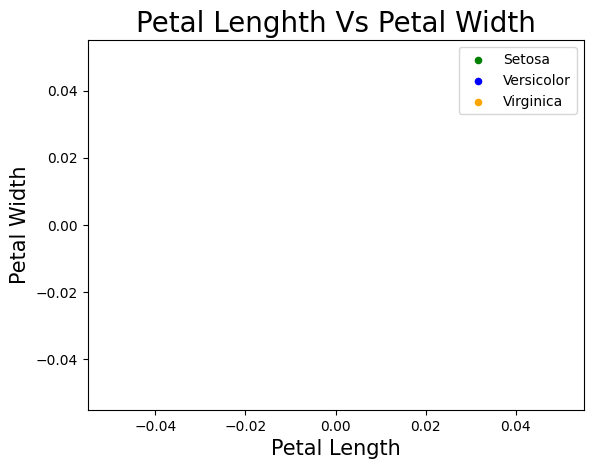

In [33]:
#Petal length VS Petal Width
fig = iris[iris.species == 'Iris-setosa'].plot.scatter(x= 'petal_length',y = 'petal_width', color = 'green', label= 'Setosa')
iris[iris.species == 'Iris-versicolor'].plot.scatter(x= 'petal_length', y = 'petal_width', color = 'blue',
                                                     label= 'Versicolor',ax = fig)
iris[iris.species == 'Iris-virginica'].plot.scatter(x= 'petal_length',y = 'petal_width', color = 'orange',
                                                    label= 'Virginica',ax = fig)
fig.set_xlabel("Petal Length", fontsize = 15)
fig.set_ylabel("Petal Width", fontsize = 15)
fig.set_title("Petal Lenghth Vs Petal Width", fontsize = 20)
plt.show()

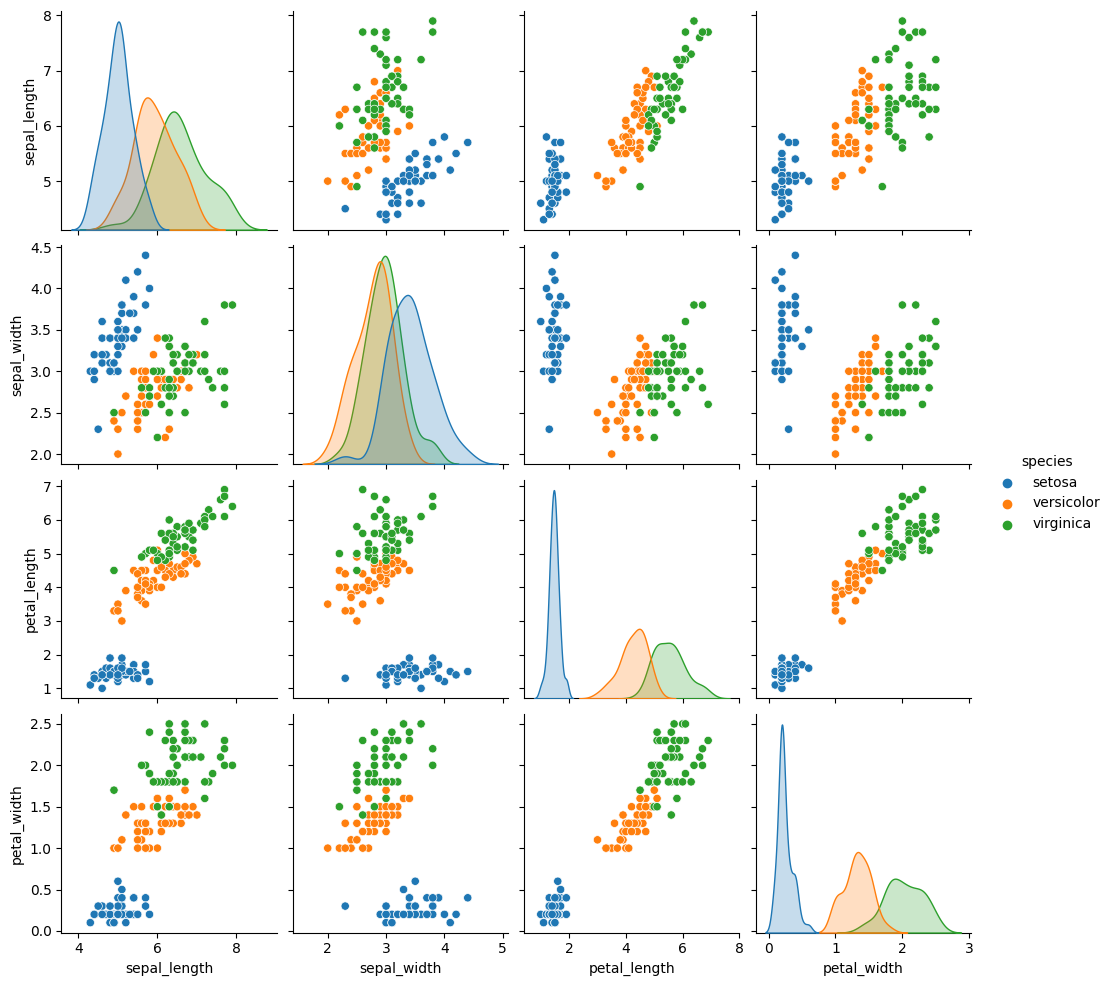

In [35]:
# pairplot for better visualization
sns.pairplot(iris, hue = 'species')

## Data Preprocessing (Correlation Matrix) To convert Categorical variable

In [36]:
# checking the correlation matrix of the categorical variables
iris.corr()

<ipython-input-36-228478570e4e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<ipython-input-37-6f3f13c494b6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(),annot = True, cmap = 'PuBu')


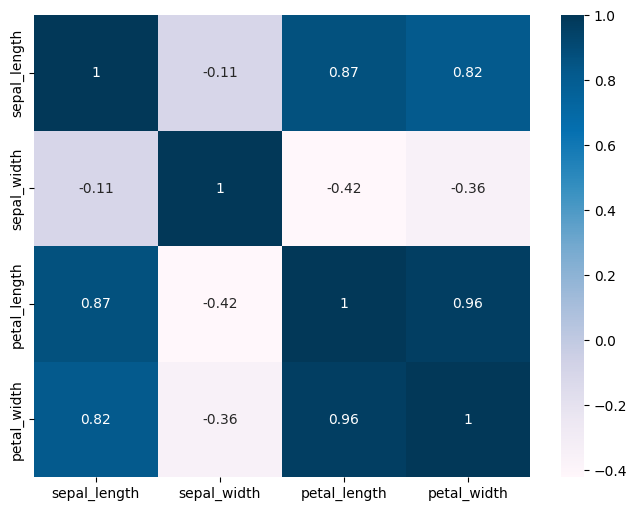

In [37]:
# plotting the correlation matrix
plt.figure(figsize = (8,6))
sns.heatmap(iris.corr(),annot = True, cmap = 'PuBu')
plt.show()

In [38]:
# sklearn library
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

In [39]:
LE = LabelEncoder()

In [40]:
iris.iloc[:,-1] =  LE.fit_transform(iris.iloc[:,-1])
iris

<ipython-input-40-b6a9c7d8bec1>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  iris.iloc[:,-1] =  LE.fit_transform(iris.iloc[:,-1])


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Splitting the data into independent and dependent data

In [41]:
x =  iris.iloc[:,:-1]
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [42]:
y = iris.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

## Splitting the data set into train and test split

In [43]:
# to split the data in test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 50)
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
125,7.2,3.2,6.0,1.8
98,5.1,2.5,3.0,1.1
73,6.1,2.8,4.7,1.2
144,6.7,3.3,5.7,2.5
21,5.1,3.7,1.5,0.4


In [44]:
#shape of X_train and X_test
print(X_train.shape, X_test.shape)

(120, 4) (30, 4)


In [45]:
#shape of y_train and y_test
print(y_train.shape, y_test.shape)

(120,) (30,)


## Model Builiding for decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [47]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

## Comparison Between Actual and Predicted output

In [48]:
y_pred = dt.predict(X_test)
y_pred

array([1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 2, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2])

In [49]:
y_test = np.array(y_test)
y_test

array([1, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 1, 0, 1, 1, 2, 1,
       0, 2, 1, 2, 1, 1, 1, 2])

In [50]:
final_pred = pd.DataFrame( { 'Actual':  y_test,
                            'Predicted': dt.predict( X_test) } )

In [51]:
final_pred.sample(n = 10)

,Actual,Predicted
22,0,0
17,0,0
29,2,2
18,1,1
28,1,1
23,2,2
24,1,1
4,2,2
2,0,0
11,2,2


import numpy as np
from google.colab import autoviz
df_4607128019955745133 = autoviz.get_df('df_4607128019955745133')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4607128019955745133, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4607128019955745133 = autoviz.get_df('df_4607128019955745133')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4607128019955745133, *['Actual'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4607128019955745133 = autoviz.get_df('df_4607128019955745133')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_4607128019955745133, *['Predicted'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4607128019955745133 = autoviz.get_df('df_4607128019955745133')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4607128019955745133, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4607128019955745133 = autoviz.get_df('df_4607128019955745133')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4607128019955745133, *['Actual'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4607128019955745133 = autoviz.get_df('df_4607128019955745133')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_4607128019955745133, *['Predicted'], **{})
chart

import numpy as np
from google.colab import autoviz
df_4607128019955745133 = autoviz.get_df('df_4607128019955745133')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_4607128019955745133, *[[['index', 'Actual'], ['Actual', 'Predicted']]], **{})
chart

In [52]:
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [53]:
metrics.accuracy_score( final_pred.Actual, final_pred.Predicted )

0.9666666666666667

## Accuracy of Decision Tree Model

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
accuracy_score(y_pred, y_test)

0.9666666666666667

## Confusion Matrics for Decision Tree Model

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
confusion_matrix(y_pred,y_test)

array([[ 9,  0,  0],
       [ 0, 11,  0],
       [ 0,  1,  9]])

## Classification Report of Decision Tree Model

In [58]:
from sklearn.metrics import classification_report

In [59]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      1.00      0.96        11
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## Decision Tree Visualization

In [60]:
from sklearn import tree

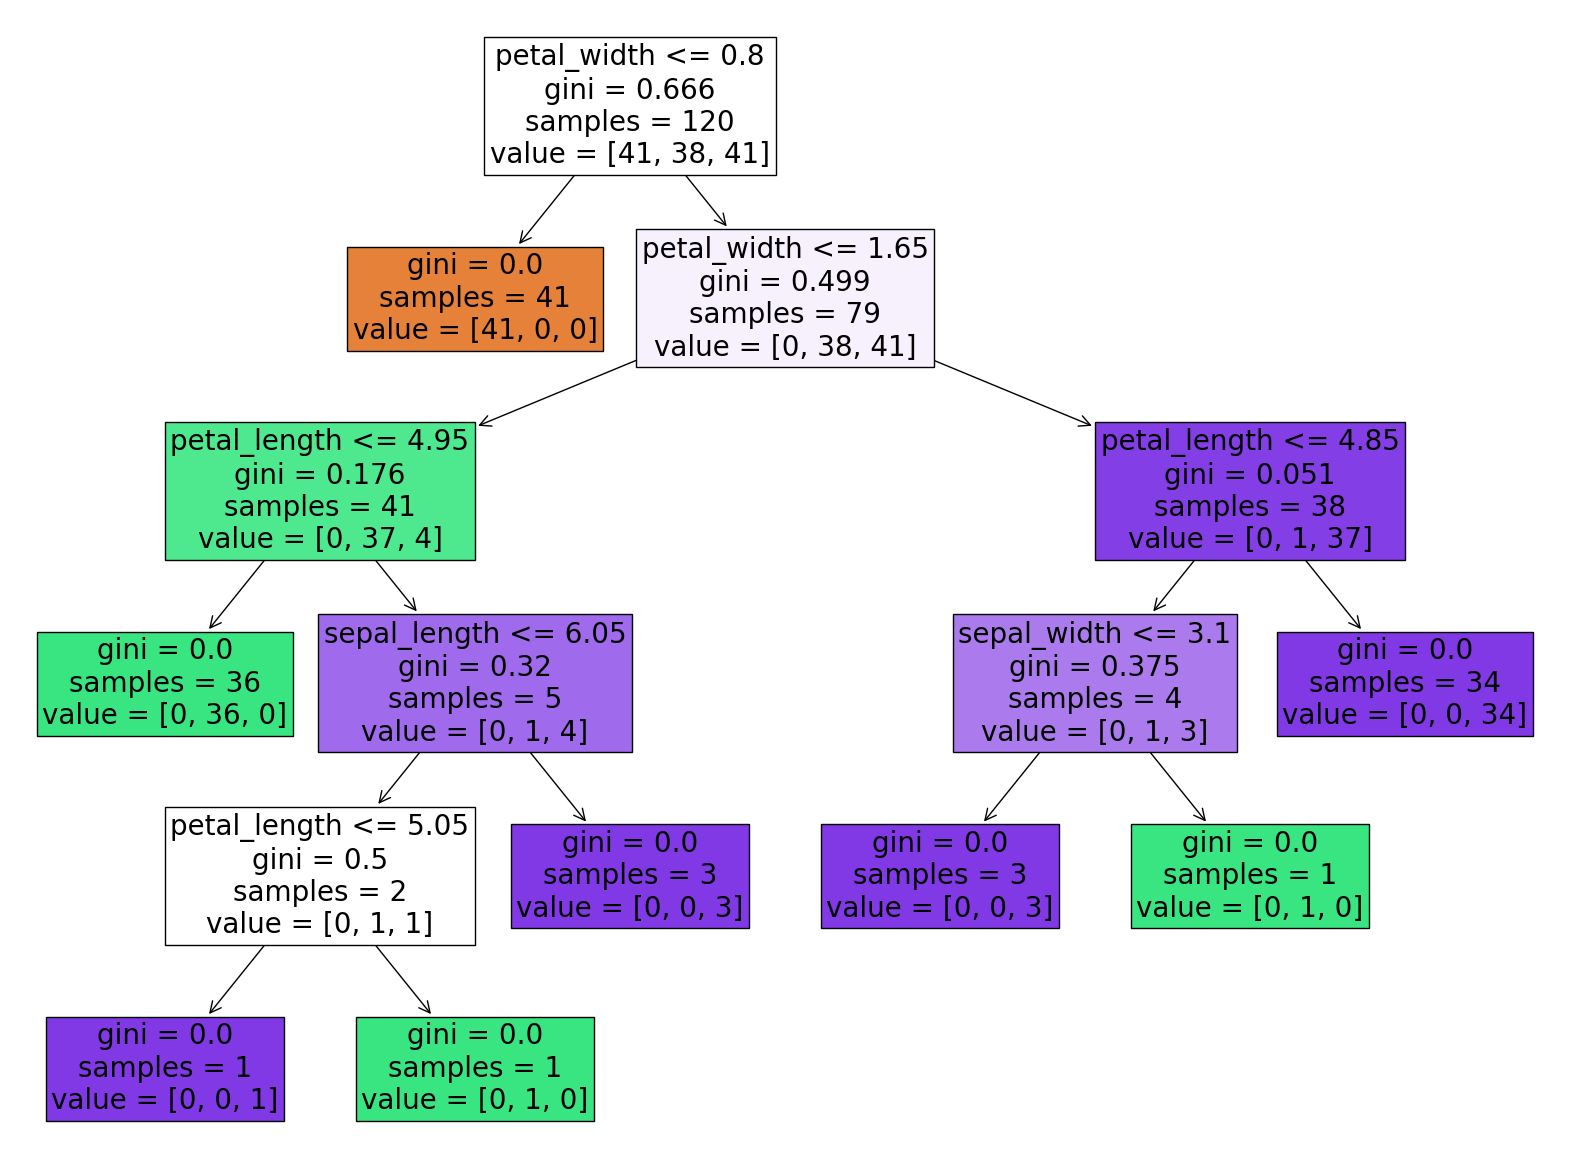

In [62]:
from matplotlib import pyplot as plt
plt.figure(figsize = (20,15))
tviz = tree.plot_tree(dt, feature_names = x.columns, filled = True,fontsize = 20)

### The Descision Tree Classifier is created and is visaulized graphically. Also the prediction was calculated using decision tree algorithm and accuracy of the model was evaluated.